# CREATING A NEURAL NETWORK FROM SCRATCH

This notebook goes through in detail how to implement a modular neural network architecture with definable lengths and number of hidden layers and different activation functions. The initial aim was to use many different non-linear optimisation methods with this neural network and to include bias terms but time was limiting. 

The code is based off the code provided in this article, https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6, but is expanded upon to allow variation in the neural network architecture.

The requirements to run this code is numpy, matplotlib and tqdm (any versions).

## What is a neural network

A neural network, also known as artificial neural networks, are a common type of machine learning architecture that took inspriation from the brain's network of neurons. 

They are made of many layers of nodes, including an input layer, with each node representing a feature; one or multiple hidden layers and and output layer, which represents the prediction, as shown in the image below:
    <img src="images/deep_neural_network.png" alt="drawing" width="500" align='centre'/>
<div style="text-align:center">
Fig.1 - Deep Neural Network, taken from https://www.ibm.com/uk-en/cloud/learn/neural-networks
</div>

Each node in a layer is connected to every other node in the next layer through a weight which is fine-tuned throughout training the neural network, normally using gradient descent.

## Setting up the Neural Network class

The inputs for the class are:
1. x = a 2D array for the input features for all examples used to train the neural network
2. y = a 1D or 2D array of the true values for all examples, they are used to compare the prediction and so calculate a loss
3. length_layers = how many nodes are in each hidden layer
4. no_of_layers = how many hidden layers in the neural network
5. activate_function = which activation function to use at each node
6. a_f_derivative = the derivative the corresponding activation function

```
class NeuralNetwork:
    def __init__(self, 
                x,
                y,
                length_layers,
                no_of_layers,
                activate_function=sigmoid,
                a_f_derivative= sigmoid_derivative
                ):
    
```
The weights and layers are created as a list of arrays, with the first layer being the input 'x'. This allows them to be iterated through during feedforward and backpropogation steps. The inputs are also defined as attributes of the class.

```
        self.input = x
        self.no_of_layers = no_of_layers + 1
        self.weights = [0] * self.no_of_layers
        self.layers = [0] * self.no_of_layers
        self.layers[0] = self.input
        self.length_layers = length_layers
        self.activate_function = activate_function
        self.a_f_derivative = a_f_derivative
        self.y = y
```
A new list, 'loss_tracker' is initalised and will be used to track the loss of the neural network for each epoch.
```
        self.loss_tracker = []
```
The weights and layers lists are iterated through and initialised so that the layer and weights arrays have the correct dimensions for the feedforward and backpropogation step.
- The weights are given random values and are given the dimensions of (the length of the row of the previous layer, the predetermined legnth of the hidden layer)
- The hidden layers are calculated using the activation function and numpy.dot() to generate initial values and the correct dimensions
- The final weights is given the dimensions neccesary to produce the same number of nodes in the output layer as there are dimensions in the true value, 'y' (typically will be 1).
```
        for i in range(1, self.no_of_layers):
            self.weights[i-1] = np.random.rand(self.layers[i-1].shape[1], self.length_layers)
            self.layers[i] = self.activate_function(np.dot(self.layers[i-1], self.weights[i-1]))
        self.weights[-1] = np.random.randn(self.length_layers, y.shape[1])
```

## Feedforward

The neural networks passes the input features through the hidden layers with the information travelling 'forward' through the network. The consecutive linear algebra on each hidden layer results in an ouput layer that is a prediction for the true values.

<div style="text-align:centre">
$\hat{y}=\sigma(W_{1}x) + b_{1}$
</div>

For example a neural network with a single hidden layer with a single node (that does not use biases) will be simply calculating:

<div style="text-align:center">
$\hat{y}=\sigma(W_{2}\sigma(W_{1}x))$
</div>

where $\sigma$ represents an activation function whose function and maths will be explained below.

A loss function is calculated from the difference between the prediction ($\hat{y}$) and true value ($y$) square summed across all examples ($N$) passed through the neural network:

<div style="text-align:center">
$\sum_{i=1}^{N} (y-\hat{y})^{2}$
</div>

This loss function provides a single value for how well the neural network is predicting a value for the examples and is minimsed during backpropogation to increase the accuracy of the model.

The NeuralNetwork class has a function, following the equation above, to produce a prediction so that a loss function can be calculated. It iterates through each hidden layer and finds the dot product of the layers multplied by the weights. The output layer is also calculated in the same way.

```
    def feedforward(self):
        for i in range(1, self.no_of_layers):
            self.layers[i] = 
                self.activate_function(np.dot(self.layers[i-1], self.weights[i-1]))
        self.output = self.activate_function(np.dot(self.layers[i], self.weights[i]))
     
```

## Activation Functions

Activation functions are used in neural networks to convert the previous layers value multplied by the weight into a form that can be passed onto the next layer. This ensures that the values of the output are restricted in their magnitude and they also add non-linearity into the neural network.

For example, the sigmoid function, used in this implementation as a default, converts all values into values between 1 and 0. Therefore very large values are treated as very similiar to each other.

<img src="images/sigmoid_function.png" alt="drawing" width="300" align='centre'/>
<div style="text-align:centre">
Fig.2 - A graph of the sigmoid function, taken from https://en.wikipedia.org/wiki/Sigmoid_function
</div>

This can be coded up using the equation:
<div style="text-align:centre">
$S(x) = \frac{1}{1+\exp(-x)}$
</div>

to 
```
    def sigmoid(x):
        return 1.0/(1 + np.exp(-x))
```

Other activation functions are commonly used in neural networks like the ReLu, which converts all negative values to 0, and TanH function, like sigmoid but converts values into values between 1 and -1. However in this example, the sigmoid function is chosen.

## Backpropogation
Now that a loss function has been calculated it can be used to change the weights so that this loss function is minimised. The method we are using in this neural network is gradient descent, where the change in loss with relation to the weights for each layer is used to adjust weights in order to produce better predictions during the next iteration of ```feedfoward()```. The theory is that if the slope is followed downwards you will be able to find the global minimum of the high-dimensionality space for the weights, relative to the loss. The model with the lowest loss is the best possible model, although in practise will most likely overfit to the data and perform poorly on data it was not exposed to during training.

The change in loss with relation to each set of weights is done by working backwards through the network, hence 'back' with the gradients of the loss of function relative to the weights used to calculate the preceding weight's gradient, hence 'propogate'. 

Mathematically this is achieved using the chain rule, with the following example displaying this methodology:

STEP 1. Consider a simple neural network with two hidden layers, $a^{L}$ and $a^{L-1}$ (pictured) where:  
<div style="text-align:center">
<div>
$z^{L}= a^{L-1}w^{L-1}+b^{L-1}$
</div>
<div>
$a^{L} = \sigma(z^{L})$
</div>
<div>
$C = (a^{L} - y)^{2}$
</div>
<img src="images/backpropogation_example.png" alt="drawing" width="400" align='centre'/>
<div style="text-align:center">
Fig.3 A simplified representation of the final layer of a neural network, taken from https://towardsdatascience.com/the-maths-behind-back-propagation-cf6714736abf
</div>

STEP 2. In order to get $\frac{\delta C}{\delta W^{L-1}}$, and so do gradient descent, we need to calculate  $\frac{\delta C}{\delta a^{L}}$,  $\frac{\delta a^{L}}{\delta z^{L}}$, $\frac{\delta z^{L}}{\delta w^{L-1}}$ and multiply them together

<div style="text-align:center">
<div> $\frac{\delta C}{\delta a^{L}} = 2(a^{L}- y)$ as $C = (a^{L}- y)^{2}$ </div>
<div> $\frac{\delta a^{L}}{\delta z^{L}} = \sigma'(z^{L})$ where  $\sigma'(z^{L})$ is the derivative sigmoid function of $z^{L}$, which is included as a input of the class</div>
<div>$\frac{\delta z^{L}}{\delta w^{L-1}} = a^{L-1} $ as $z^{L}= a^{L-1}w^{L-1}+b^{L-1}$ </div>
</div>

STEP 3. Therefore to calculate the $\frac{\delta C}{\delta W^{L-2}}$ for the next set of weights requires us to continue to follow along this chain so $\frac{\delta C}{\delta W^{L-1}}$ can be broken down into the product of $\frac{\delta C}{\delta a^{L-1}}$,  $\frac{\delta a^{L-1}}{\delta z^{L-1}}$, $\frac{\delta z^{L-1}}{\delta w^{L-2}}$

<div style="text-align:center">
<div> $\frac{\delta a^{L-1}}{\delta z^{L-1}} = \sigma'(z^{L-1})$ where  $\sigma'(z^{L-1})$ is the derivative sigmoid function of $z^{L-1}$ </div>
<div>$\frac{\delta z^{L-1}}{\delta w^{L-2}} = a^{L-2} $ as $z^{L-1}= a^{L-2}w^{L-2}+b^{L-2}$ </div>

</div>

However calculating $\frac{\delta C}{\delta a^{L-1}}$ requries further decomposition into separate derivatives, $\frac{\delta C}{\delta a^{L}}$,  $\frac{\delta a^{L}}{\delta z^{L}}$ and $\frac{\delta z^{L}}{\delta a^{L-1}}$ 
<div style="text-align:center">
$\frac{\delta z^{L}}{\delta a^{L-1}} = w^{L-1}$ as $z^{L}= a^{L-1}w^{L-1}+b^{L-1}$
</div>
</div>


$\frac{\delta C}{\delta a^{L}}$ and $\frac{\delta a^{L}}{\delta z^{L}}$ have already been calculated in STEP 2 so we can just use calculated values. If you continue going back through the weights, you will find that each derivative of C with relation to the weights contains the product of derivatives calculated for later weights.

This is taken advantage of in the ```backpropogate()``` function which uses a temporary variable ```propogate_weights``` to keep track of derivatives needed for future calculations as it iterates through the weights. This function is quite complicated but is concisely doing the calculus described above.

```
    def backpropropgate(self):
        for i in range(self.no_of_layers-1, -1, -1):
            if i == self.no_of_layers-1:
                weight_propogate = 2*(self.y-self.output) * self.a_f_derivative(self.output)
                self.weights[i] += np.dot(self.layers[i].T, weight_propogate)  
            else:
                self.weights[i] += np.dot(self.layers[i].T, (np.dot(weight_propogate, self.weights[i+1].T)* self.a_f_derivative(self.layers[i+1])))
                weight_propogate = (np.dot(weight_propogate, self.weights[i+1].T)* self.a_f_derivative(self.layers[i+1]))
        self.track_loss(sum((self.y - self.output)**2))
```

## Other functions

In order to train the neural network, we must repeatedly feedforward to produce a new cost and then use that cost function to adjust the weights. THis is done using the function ```train()``` which takes in the number of epochs, the number of times the network is retrained on the data, as input. 


```
    def train(self, iterations):
        for i in tqdm(range(iterations)):
            self.feedforward()
            self.backpropropgate()
        print(self.output)
        plt.scatter(list(range(0, iterations)), self.loss_tracker)
        plt.yscale('log')
        plt.show()

```

In order to see how quickly the loss is reduced for each epoch, we will save the loss to a list using ```track_loss()``` 
```
    def track_loss(self, loss):
        self.loss_tracker.append(loss)

```

## A test
To test the new this neural network, we are training on the small dataset provided in https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6. In theory it can be used on any dataset but I have not managed to find parameters that work on larger datasets and training time takes too long.

In [1]:
from neural_network import NeuralNetwork
from activation_functions import *
import matplotlib.pyplot as plt

100%|██████████| 500/500 [00:00<00:00, 12537.38it/s]

The predicted values are [[0.11131968]
 [0.91408829]
 [0.91408839]
 [0.10648309]]


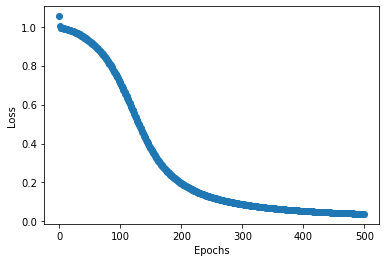

In [3]:
# Features
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
# True values
y = np.array([[0],[1],[1],[0]])

# An instance of a neural network with one hidden layer, with length 2, using the sigmoid function as the activation function
nn = NeuralNetwork(X,y, 2, 1, activate_function=sigmoid, a_f_derivative=sigmoid_derivative)

nn.train(500)